In [1]:
import os
import librosa
import librosa.display
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Nice clean plots
plt.style.use('seaborn-v0_8-muted')
plt.rcParams['figure.figsize'] = (10, 4)
plt.rcParams['axes.facecolor'] = '#f8f9fa'
plt.rcParams['axes.edgecolor'] = '#dee2e6'

In [46]:
AUDIO_DIR = "C:/Users/LENOVO/Documents/formative2-mlp/Audios/Peer_Audio_Records_WAV"

## **Task 3: Sound Data Collection and Processing**
#### **Step 1: Import Libraries and Setup**
Let me start by setting up all the necessary libraries for audio processing.

In [2]:
 # Step 1: Import Required Libraries
# We're importing tools to work with audio files, visualize them, and extract meaningful features.
import os
import numpy as np
import pandas as pd
import librosa
import librosa.display
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.io import wavfile
import warnings
warnings.filterwarnings('ignore')

# Set up visual styling for better-looking plots
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (12, 6)
plt.rcParams['font.size'] = 10

print(" All libraries imported successfully!")

 All libraries imported successfully!


#### **Step 2: Load Audio Files**
Now let's load the audio files from your Peer_Audio_Records_WAV folder.

In [5]:
# This code finds all .wav files in your folder and loads them with their information.

# Define the path to your audio files
audio_folder = "C:/Users/LENOVO/Documents/formative2-mlp/Audios/Peer_Audio_Records_WAV"

# Get all .wav files
audio_files = [f for f in os.listdir(audio_folder) if f.endswith('.wav')]

print(f" Found {len(audio_files)} audio files:")
for i, file in enumerate(audio_files, 1):
    print(f"   {i}. {file}")

# Create a dictionary to store audio data
audio_data = {}

# Load each audio file
for file in audio_files:
    file_path = os.path.join(audio_folder, file)
    # Load audio with librosa (automatically converts to mono and resamples)
    audio, sr = librosa.load(file_path, sr=None)
    audio_data[file] = {
        'audio': audio,
        'sample_rate': sr,
        'duration': len(audio) / sr,
        'file_name': file
    }

print(f"\n Successfully loaded {len(audio_data)} audio files!")

# Display basic information
print("\n Audio File Summary:")
for file, data in audio_data.items():
    print(f"   {file}: {data['duration']:.2f}s @ {data['sample_rate']} Hz")

 Found 8 audio files:
   1. Egide_Confirm_Transaction.wav
   2. Egide_Yes_Approve.wav
   3. JD_Confirm_Transaction.wav
   4. JD_yes_Approve.wav
   5. Mariam_confirm_transaction.wav
   6. Mariam_Yes_Approve.wav
   7. Noella_Confirm_Transaction.wav
   8. Noella_Yes_Approve.wav

 Successfully loaded 8 audio files!

 Audio File Summary:
   Egide_Confirm_Transaction.wav: 2.09s @ 44100 Hz
   Egide_Yes_Approve.wav: 2.60s @ 44100 Hz
   JD_Confirm_Transaction.wav: 3.20s @ 48000 Hz
   JD_yes_Approve.wav: 2.94s @ 48000 Hz
   Mariam_confirm_transaction.wav: 2.88s @ 48000 Hz
   Mariam_Yes_Approve.wav: 2.62s @ 48000 Hz
   Noella_Confirm_Transaction.wav: 2.21s @ 44100 Hz
   Noella_Yes_Approve.wav: 1.65s @ 44100 Hz


#### **Step 3: Create Waveform Visualizations**
Waveforms show the audio amplitude over time, helping us see the sound patterns visually.

 Waveforms saved to: audio_visualizations/all_waveforms.png


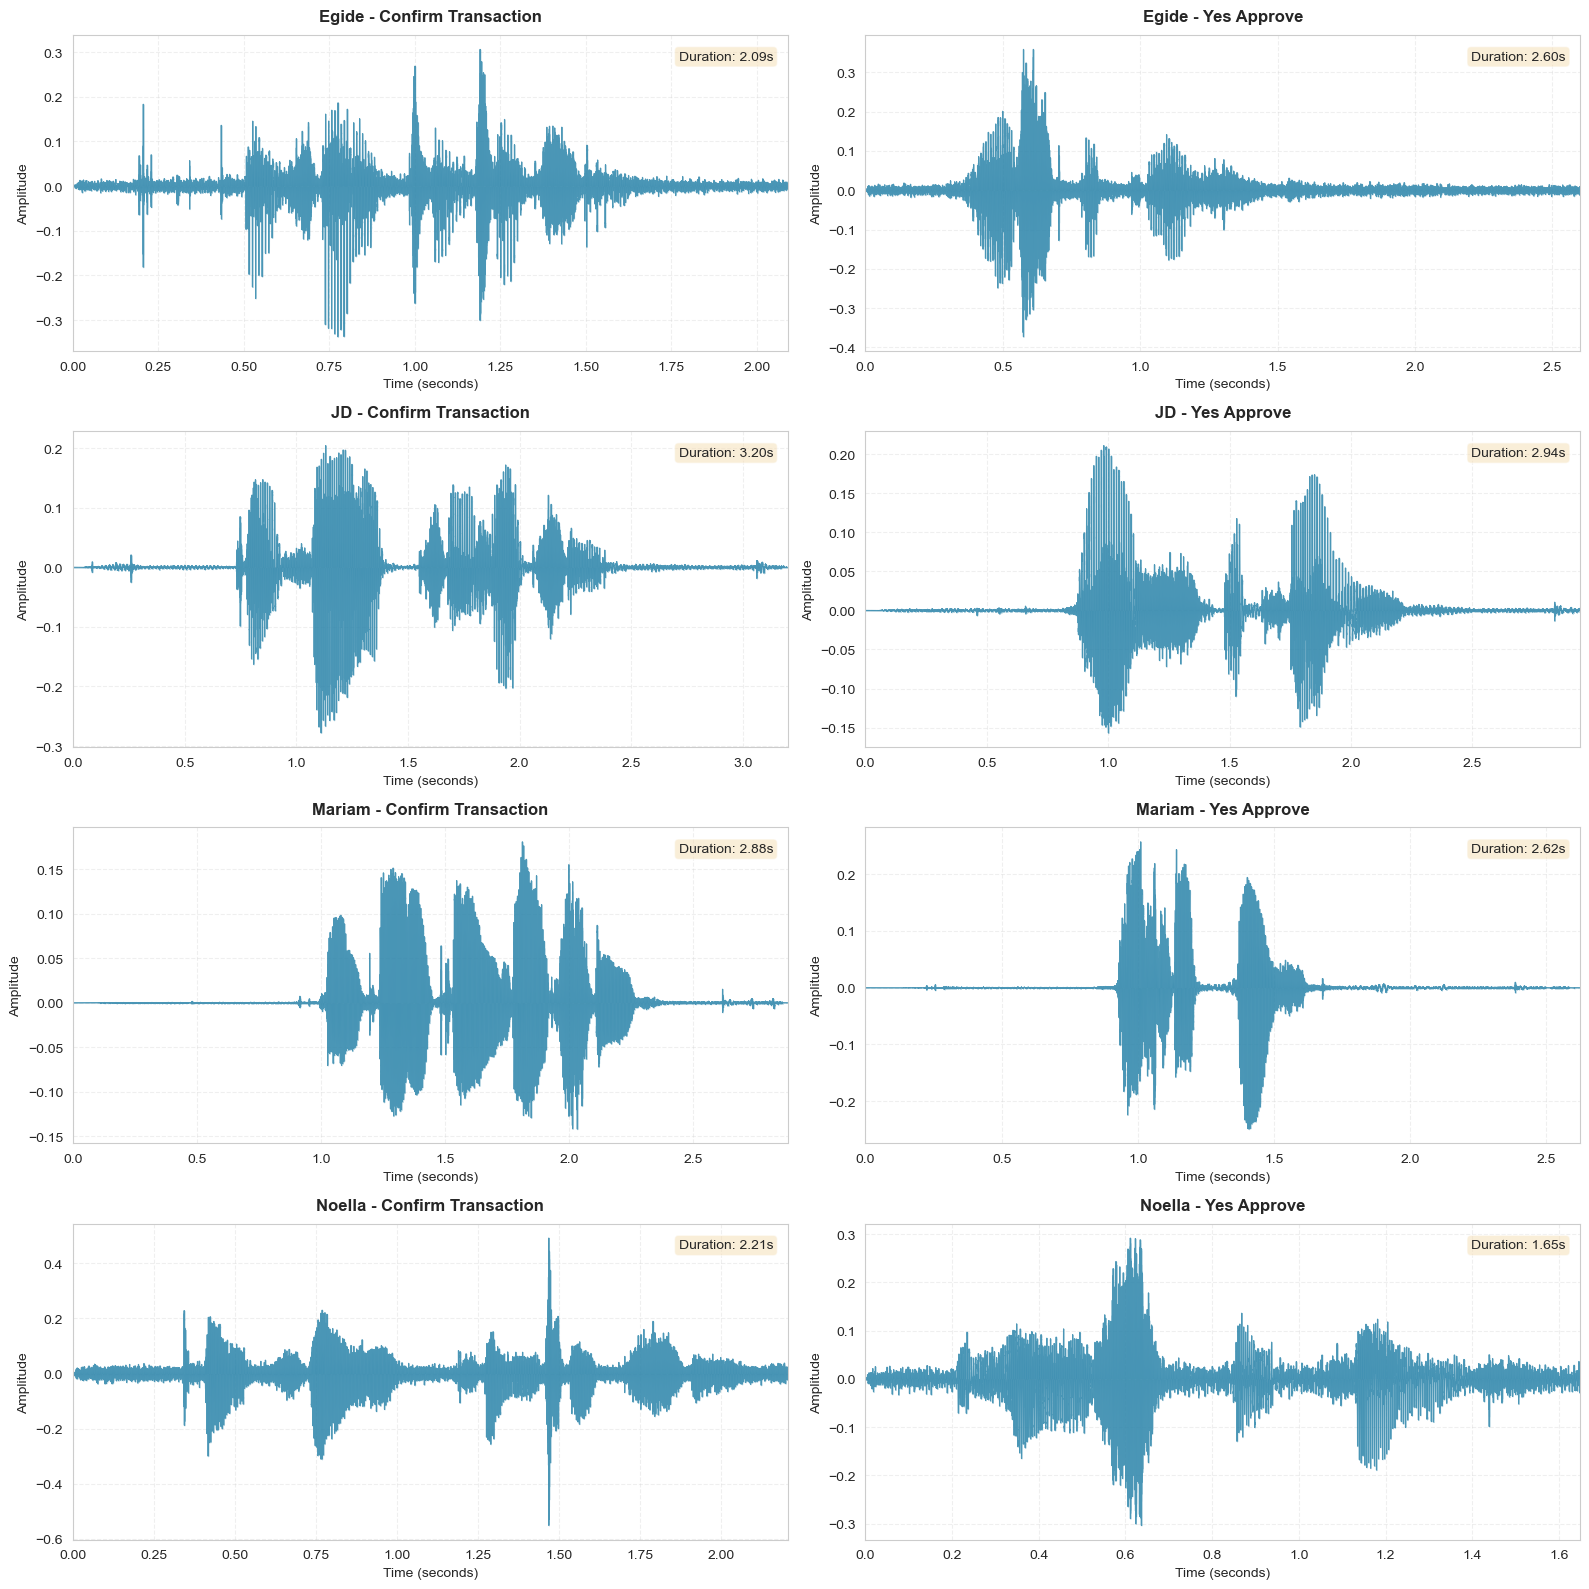

In [6]:
def plot_waveforms(audio_data, save_path='audio_visualizations'):
    """Plot waveforms for all audio files"""
    
    # Create output directory if it doesn't exist
    os.makedirs(save_path, exist_ok=True)
    
    # Calculate grid dimensions
    n_files = len(audio_data)
    n_cols = 2
    n_rows = (n_files + 1) // 2
    
    # Create a large figure with subplots
    fig, axes = plt.subplots(n_rows, n_cols, figsize=(16, 4*n_rows))
    axes = axes.flatten() if n_files > 1 else [axes]
    
    # Plot each audio file
    for idx, (file, data) in enumerate(audio_data.items()):
        ax = axes[idx]
        
        # Extract person name and phrase from filename
        name_parts = file.replace('.wav', '').split('_')
        person_name = name_parts[0]
        phrase_type = ' '.join(name_parts[1:]).title()
        
        # Create time array
        time = np.linspace(0, data['duration'], len(data['audio']))
        
        # Plot waveform
        ax.plot(time, data['audio'], color='#2E86AB', linewidth=0.8, alpha=0.8)
        ax.fill_between(time, data['audio'], alpha=0.3, color='#2E86AB')
        
        # Styling
        ax.set_title(f'{person_name} - {phrase_type}', fontsize=12, fontweight='bold', pad=10)
        ax.set_xlabel('Time (seconds)', fontsize=10)
        ax.set_ylabel('Amplitude', fontsize=10)
        ax.grid(True, alpha=0.3, linestyle='--')
        ax.set_xlim(0, data['duration'])
        
        # Add duration label
        ax.text(0.98, 0.95, f"Duration: {data['duration']:.2f}s", 
                transform=ax.transAxes, ha='right', va='top',
                bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))
    
    # Hide unused subplots
    for idx in range(n_files, len(axes)):
        axes[idx].axis('off')
    
    plt.tight_layout()
    plt.savefig(f'{save_path}/all_waveforms.png', dpi=300, bbox_inches='tight')
    print(f" Waveforms saved to: {save_path}/all_waveforms.png")
    plt.show()

# Generate the visualizations
plot_waveforms(audio_data)

#### **Step 4: Create Spectrogram Visualizations**
Spectrograms reveal frequency patterns over time, showing the "color" of different sounds.

 Spectrograms saved to: audio_visualizations/all_spectrograms.png


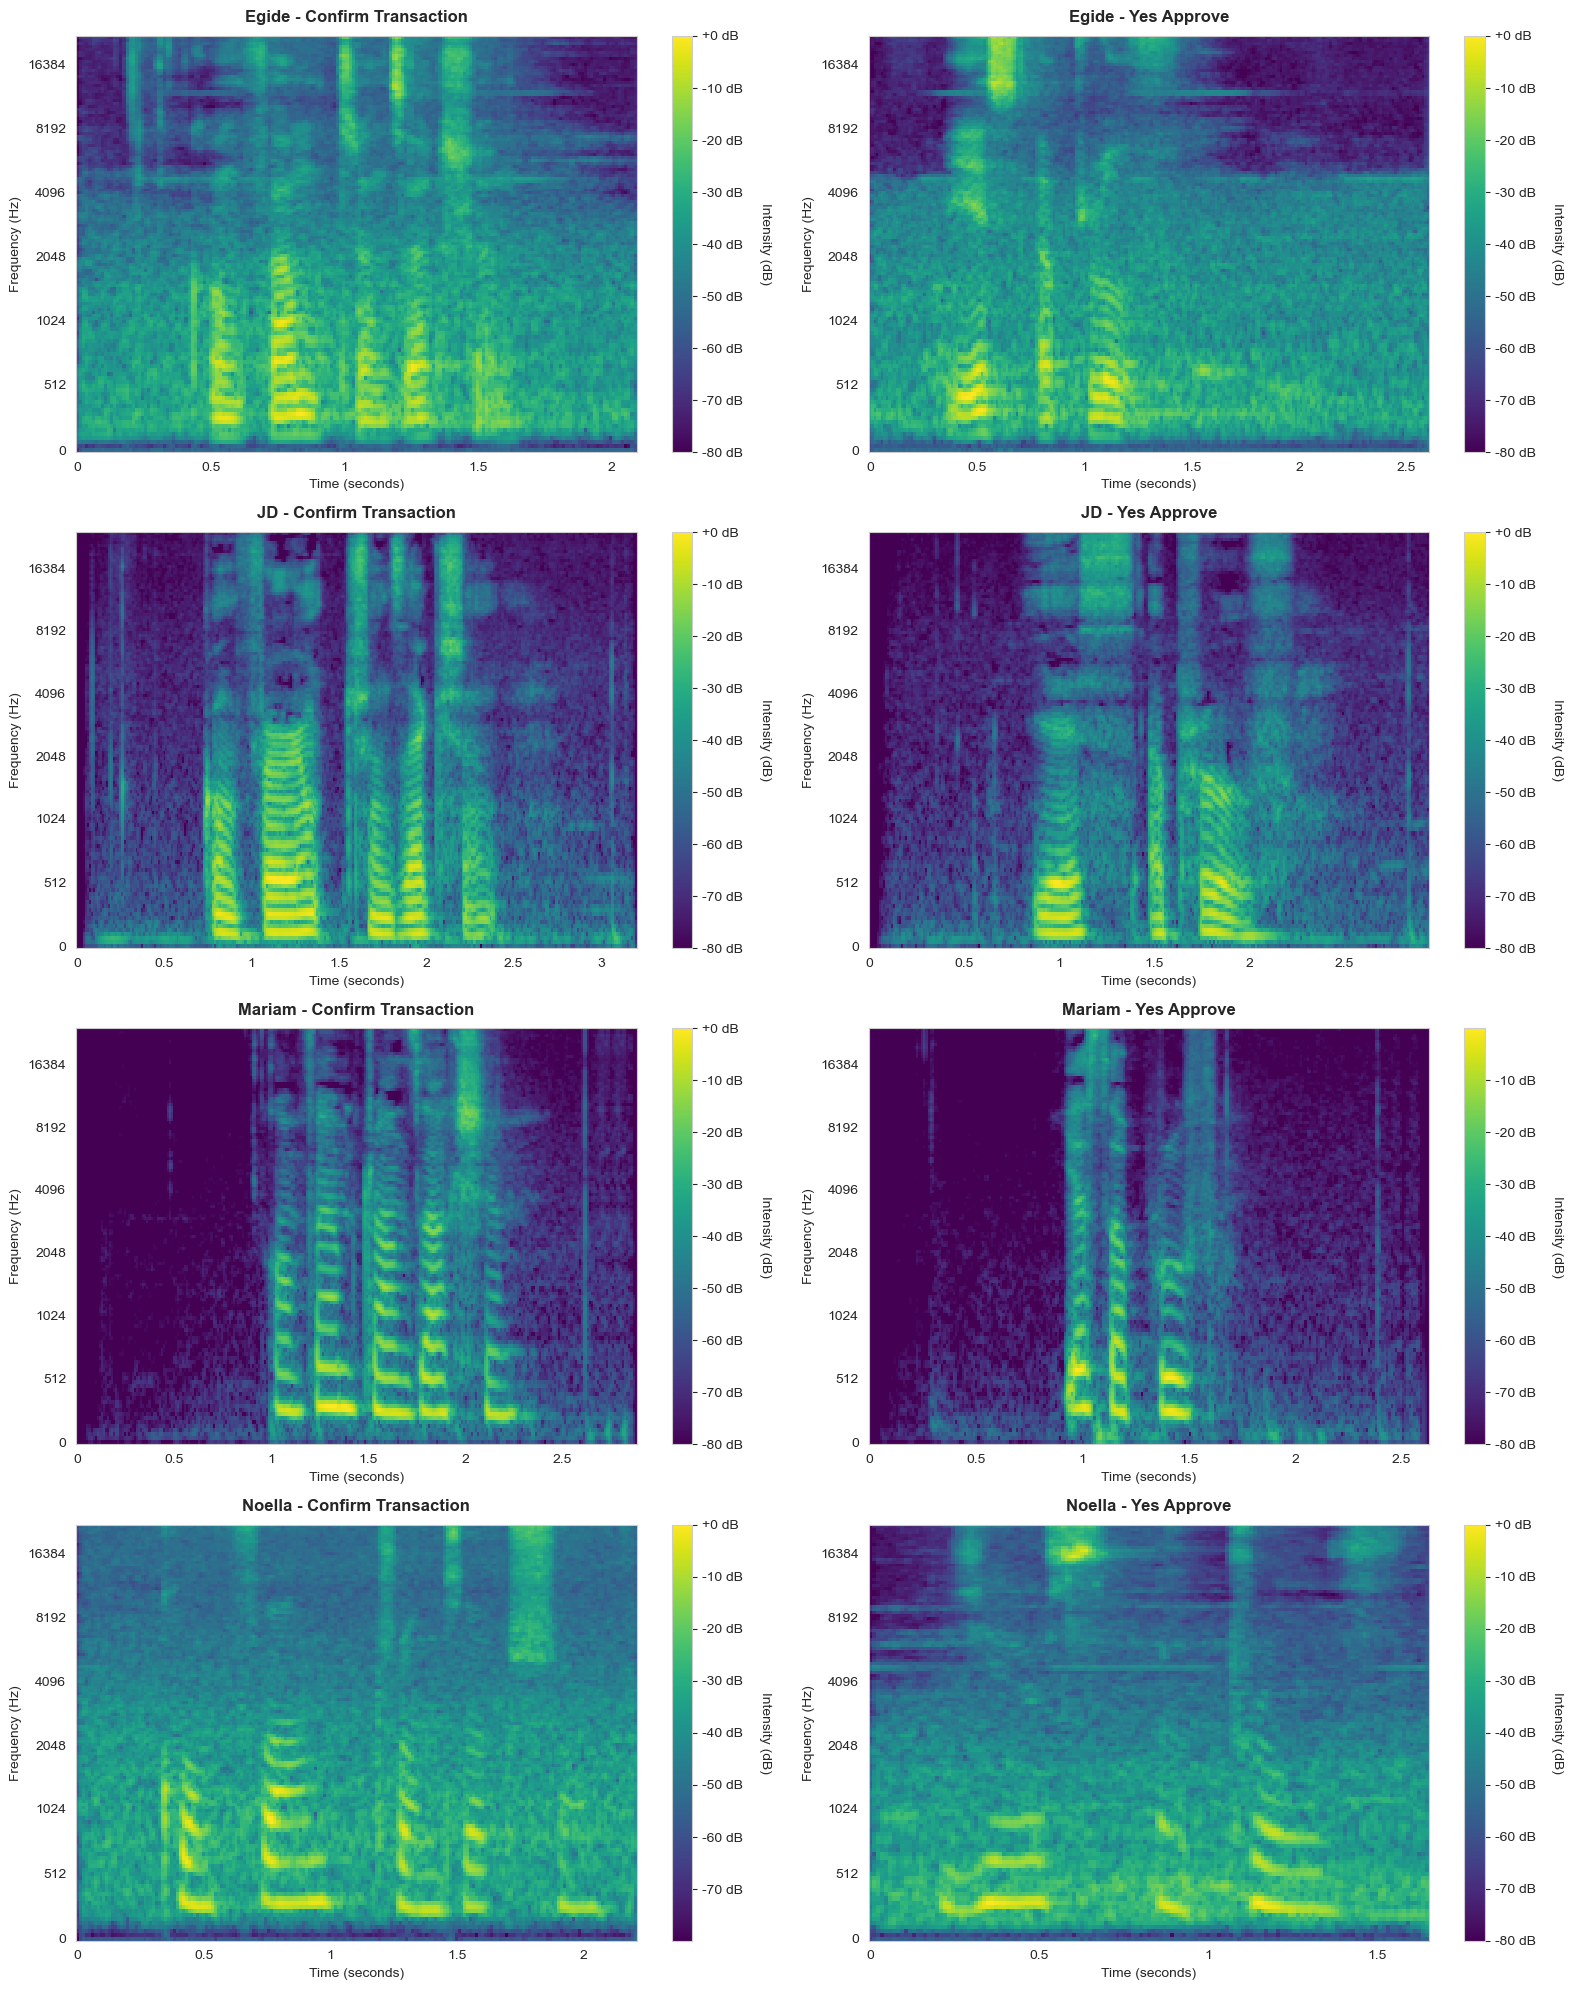

In [7]:
def plot_spectrograms(audio_data, save_path='audio_visualizations'):
    """Generate mel spectrograms for all audio files"""
    
    os.makedirs(save_path, exist_ok=True)
    
    n_files = len(audio_data)
    n_cols = 2
    n_rows = (n_files + 1) // 2
    
    fig, axes = plt.subplots(n_rows, n_cols, figsize=(16, 5*n_rows))
    axes = axes.flatten() if n_files > 1 else [axes]
    
    for idx, (file, data) in enumerate(audio_data.items()):
        ax = axes[idx]
        
        # Extract name and phrase
        name_parts = file.replace('.wav', '').split('_')
        person_name = name_parts[0]
        phrase_type = ' '.join(name_parts[1:]).title()
        
        # Compute mel spectrogram
        mel_spec = librosa.feature.melspectrogram(
            y=data['audio'], 
            sr=data['sample_rate'],
            n_mels=128,
            fmax=8000
        )
        mel_spec_db = librosa.power_to_db(mel_spec, ref=np.max)
        
        # Plot spectrogram
        img = librosa.display.specshow(
            mel_spec_db,
            sr=data['sample_rate'],
            x_axis='time',
            y_axis='mel',
            ax=ax,
            cmap='viridis'
        )
        
        # Add colorbar
        cbar = plt.colorbar(img, ax=ax, format='%+2.0f dB')
        cbar.set_label('Intensity (dB)', rotation=270, labelpad=20)
        
        # Styling
        ax.set_title(f'{person_name} - {phrase_type}', fontsize=12, fontweight='bold', pad=10)
        ax.set_xlabel('Time (seconds)', fontsize=10)
        ax.set_ylabel('Frequency (Hz)', fontsize=10)
    
    # Hide unused subplots
    for idx in range(n_files, len(axes)):
        axes[idx].axis('off')
    
    plt.tight_layout()
    plt.savefig(f'{save_path}/all_spectrograms.png', dpi=300, bbox_inches='tight')
    print(f" Spectrograms saved to: {save_path}/all_spectrograms.png")
    plt.show()

# Generate spectrograms
plot_spectrograms(audio_data)

#### **Step 5: Audio Augmentation Functions**
These functions create realistic variations of audio to help train better machine learning models. Now we'll create variations of your audio by applying pitch shift, time stretch, and background noise.

In [8]:
def add_noise(audio, noise_factor=0.005):
    """Add random background noise to audio"""
    noise = np.random.randn(len(audio))
    augmented_audio = audio + noise_factor * noise
    # Normalize to prevent clipping
    augmented_audio = augmented_audio / np.max(np.abs(augmented_audio))
    return augmented_audio.astype(np.float32)

def pitch_shift(audio, sr, n_steps=2):
    """Shift the pitch up or down by n_steps semitones"""
    return librosa.effects.pitch_shift(audio, sr=sr, n_steps=n_steps)

def time_stretch(audio, rate=1.1):
    """Speed up or slow down audio (rate > 1 = faster, rate < 1 = slower)"""
    return librosa.effects.time_stretch(audio, rate=rate)

def augment_audio(audio_data):
    """Apply multiple augmentations to each audio file"""
    
    augmented_data = {}
    augmentation_stats = []
    
    for file, data in audio_data.items():
        base_name = file.replace('.wav', '')
        original_audio = data['audio']
        sr = data['sample_rate']
        
        # Store original
        augmented_data[f"{base_name}_original"] = {
            'audio': original_audio,
            'sample_rate': sr,
            'augmentation': 'Original',
            'file_name': file
        }
        
        # Augmentation 1: Pitch shift up
        aug1 = pitch_shift(original_audio, sr, n_steps=2)
        augmented_data[f"{base_name}_pitch_up"] = {
            'audio': aug1,
            'sample_rate': sr,
            'augmentation': 'Pitch Shift +2',
            'file_name': file
        }
        
        # Augmentation 2: Time stretch
        aug2 = time_stretch(original_audio, rate=1.1)
        augmented_data[f"{base_name}_time_stretch"] = {
            'audio': aug2,
            'sample_rate': sr,
            'augmentation': 'Time Stretch 1.1x',
            'file_name': file
        }
        
        # Augmentation 3: Background noise
        aug3 = add_noise(original_audio, noise_factor=0.005)
        augmented_data[f"{base_name}_noise"] = {
            'audio': aug3,
            'sample_rate': sr,
            'augmentation': 'Background Noise',
            'file_name': file
        }
        
        # Track statistics
        augmentation_stats.append({
            'Original File': file,
            'Total Versions': 4,
            'Augmentations': 'Pitch Shift, Time Stretch, Noise'
        })
    
    print(f" Created {len(augmented_data)} audio samples from {len(audio_data)} originals")
    print(f"   (1 original + 3 augmentations per file)")
    
    return augmented_data, pd.DataFrame(augmentation_stats)

# Apply augmentations
augmented_audio_data, aug_stats = augment_audio(audio_data)

# Display statistics
print("\n Augmentation Summary:")
print(aug_stats.to_string(index=False))

 Created 32 audio samples from 8 originals
   (1 original + 3 augmentations per file)

 Augmentation Summary:
                 Original File  Total Versions                    Augmentations
 Egide_Confirm_Transaction.wav               4 Pitch Shift, Time Stretch, Noise
         Egide_Yes_Approve.wav               4 Pitch Shift, Time Stretch, Noise
    JD_Confirm_Transaction.wav               4 Pitch Shift, Time Stretch, Noise
            JD_yes_Approve.wav               4 Pitch Shift, Time Stretch, Noise
Mariam_confirm_transaction.wav               4 Pitch Shift, Time Stretch, Noise
        Mariam_Yes_Approve.wav               4 Pitch Shift, Time Stretch, Noise
Noella_Confirm_Transaction.wav               4 Pitch Shift, Time Stretch, Noise
        Noella_Yes_Approve.wav               4 Pitch Shift, Time Stretch, Noise


#### **Step 6: Visualize Augmentation Effects**
 This shows how each augmentation technique modifies the original audio signal. Let's see how the augmentations changed your audio by comparing original vs augmented versions.

 Augmentation comparison saved to: audio_visualizations/augmentation_comparison.png


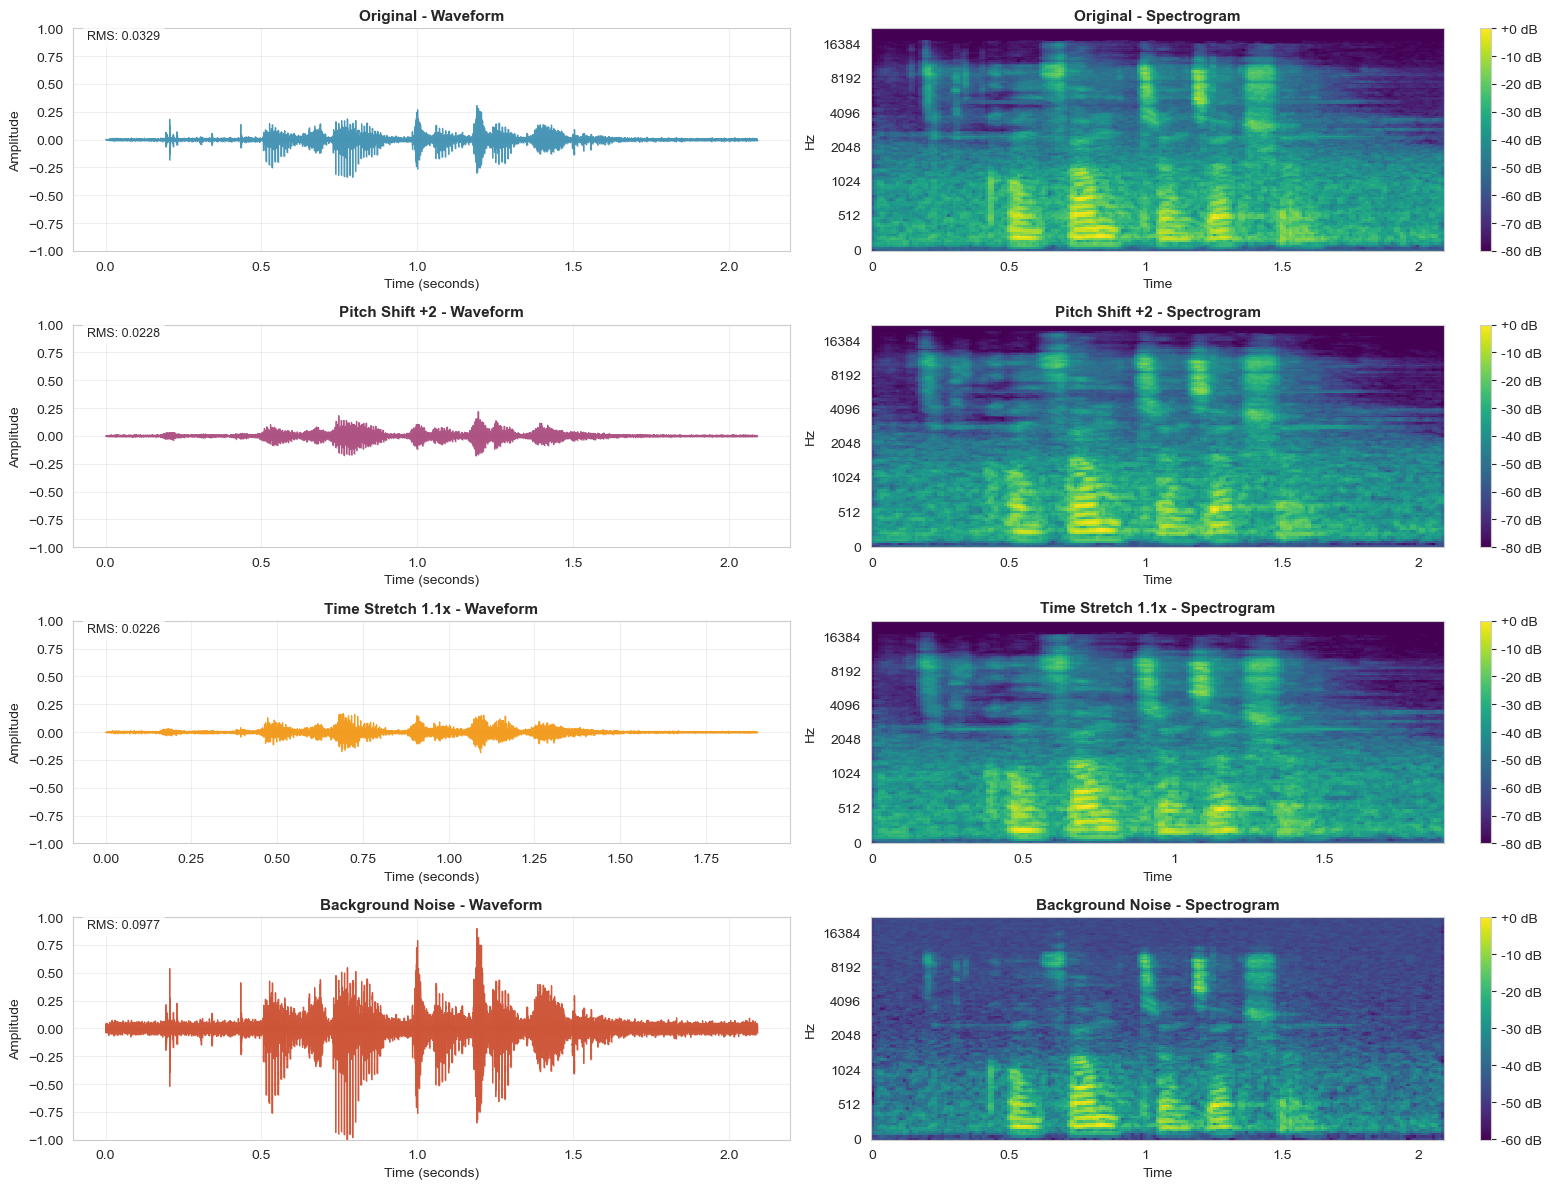

In [16]:
def visualize_augmentations(augmented_data, sample_file_base, save_path='audio_visualizations'):
    """Compare original with all augmentations for one sample"""
    
    os.makedirs(save_path, exist_ok=True)
    
    # Get all versions of one sample
    versions = ['original', 'pitch_up', 'time_stretch', 'noise']
    colors = ['#2E86AB', '#A23B72', '#F18F01', '#C73E1D']
    
    fig, axes = plt.subplots(4, 2, figsize=(16, 12))
    
    for idx, version in enumerate(versions):
        key = f"{sample_file_base}_{version}"
        
        if key not in augmented_data:
            continue
            
        data = augmented_data[key]
        audio = data['audio']
        sr = data['sample_rate']
        aug_type = data['augmentation']
        
        # Left column: Waveform
        ax_wave = axes[idx, 0]
        time = np.linspace(0, len(audio)/sr, len(audio))
        ax_wave.plot(time, audio, color=colors[idx], linewidth=0.8, alpha=0.8)
        ax_wave.fill_between(time, audio, alpha=0.3, color=colors[idx])
        ax_wave.set_title(f'{aug_type} - Waveform', fontsize=11, fontweight='bold')
        ax_wave.set_xlabel('Time (seconds)')
        ax_wave.set_ylabel('Amplitude')
        ax_wave.grid(True, alpha=0.3)
        ax_wave.set_ylim(-1, 1)
        
        # Add stats label
        rms = np.sqrt(np.mean(audio**2))
        ax_wave.text(0.02, 0.95, f'RMS: {rms:.4f}', 
                    transform=ax_wave.transAxes, 
                    bbox=dict(boxstyle='round', facecolor='white', alpha=0.8),
                    fontsize=9)
        
        # Right column: Spectrogram
        ax_spec = axes[idx, 1]
        mel_spec = librosa.feature.melspectrogram(y=audio, sr=sr, n_mels=128)
        mel_spec_db = librosa.power_to_db(mel_spec, ref=np.max)
        
        img = librosa.display.specshow(
            mel_spec_db, sr=sr, x_axis='time', y_axis='mel',
            ax=ax_spec, cmap='viridis'
        )
        ax_spec.set_title(f'{aug_type} - Spectrogram', fontsize=11, fontweight='bold')
        plt.colorbar(img, ax=ax_spec, format='%+2.0f dB')
    
    plt.tight_layout()
    plt.savefig(f'{save_path}/augmentation_comparison.png', dpi=300, bbox_inches='tight')
    print(f" Augmentation comparison saved to: {save_path}/augmentation_comparison.png")
    plt.show()

# Visualize augmentations for the first speaker
first_file = list(audio_data.keys())[0]
base_name = first_file.replace('.wav', '')
visualize_augmentations(augmented_audio_data, base_name)

#### **Step 7: Extract MFCC Features**
MFCCs (Mel-Frequency Cepstral Coefficients) are the most important features for voice recognition tasks. They capture the unique characteristics of human voice, essential for speaker identification.

In [10]:
def extract_mfcc_features(audio, sr, n_mfcc=13):
    """Extract MFCC features from audio"""
    
    # Extract MFCCs
    mfccs = librosa.feature.mfcc(y=audio, sr=sr, n_mfcc=n_mfcc)
    
    # Calculate statistics for each MFCC coefficient
    mfcc_features = {
        'mfcc_mean': np.mean(mfccs, axis=1),
        'mfcc_std': np.std(mfccs, axis=1),
        'mfcc_min': np.min(mfccs, axis=1),
        'mfcc_max': np.max(mfccs, axis=1)
    }
    
    return mfcc_features, mfc

#### **Step 7: MFCC Feature Extraction**

In this step, we extract Mel-Frequency Cepstral Coefficients (MFCCs)  a powerful set of features that represent how humans perceive sound.
They capture the shape of the audio spectrum, helping our machine learning model understand key voice characteristics.

For each audio sample, we compute 13 MFCC coefficients and then calculate statistical summaries:

Mean is average pattern of each MFCC across time

Standard deviation (std) is a variation across the signal

Minimum and maximum is a boundary values for each MFCC

These values are then stored for every sample in a DataFrame named mfcc_df

In [25]:
def extract_additional_features(audio, sr):
    """Extract spectral rolloff, energy, ZCR, and centroid features."""
    rolloff = librosa.feature.spectral_rolloff(y=audio, sr=sr)
    rms_energy = librosa.feature.rms(y=audio)
    zcr = librosa.feature.zero_crossing_rate(audio)
    spectral_centroid = librosa.feature.spectral_centroid(y=audio, sr=sr)
    
    features = {
        'rolloff_mean': np.mean(rolloff),
        'rolloff_std': np.std(rolloff),
        'rolloff_min': np.min(rolloff),
        'rolloff_max': np.max(rolloff),
        'energy_mean': np.mean(rms_energy),
        'energy_std': np.std(rms_energy),
        'energy_min': np.min(rms_energy),
        'energy_max': np.max(rms_energy),
        'zcr_mean': np.mean(zcr),
        'zcr_std': np.std(zcr),
        'centroid_mean': np.mean(spectral_centroid),
        'centroid_std': np.std(spectral_centroid)
    }
    return features


print(" Adding spectral and energy features to MFCC features...")

for idx, row in mfcc_df.iterrows():
    sample_id = row['sample_id']
    if sample_id in augmented_audio_data:
        audio_info = augmented_audio_data[sample_id]
        add_feats = extract_additional_features(audio_info['audio'], audio_info['sample_rate'])
        for feat_name, feat_value in add_feats.items():
            mfcc_df.at[idx, feat_name] = feat_value

# Create final dataset
complete_audio_features = mfcc_df.copy()

print(" Extracted additional features for all samples")
print(f"\n Complete Feature Set:")
print(f"   - Total features: {complete_audio_features.shape[1]}")
print(f"   - MFCC features: 26 (13 mean + 13 std)")
print(f"   - Spectral features: 12 (rolloff, energy, zcr, centroid)")
print(f"   - Metadata: 5 (sample_id, person, phrase, augmentation, sample_rate)")

print("\n Feature Preview:")
print(complete_audio_features.head())

 Adding spectral and energy features to MFCC features...
 Extracted additional features for all samples

 Complete Feature Set:
   - Total features: 69
   - MFCC features: 26 (13 mean + 13 std)
   - Spectral features: 12 (rolloff, energy, zcr, centroid)
   - Metadata: 5 (sample_id, person, phrase, augmentation, sample_rate)

 Feature Preview:
                                sample_id person phrase       augmentation  \
0      Egide_Confirm_Transaction_original   None   None           Original   
1      Egide_Confirm_Transaction_pitch_up   None   None     Pitch Shift +2   
2  Egide_Confirm_Transaction_time_stretch   None   None  Time Stretch 1.1x   
3         Egide_Confirm_Transaction_noise   None   None   Background Noise   
4              Egide_Yes_Approve_original   None   None           Original   

   sample_rate  mfcc1_mean  mfcc1_std   mfcc1_min   mfcc1_max  mfcc2_mean  \
0        44100 -357.264191  78.297119 -565.466919 -219.599167  152.541718   
1        44100 -382.097534  78.6

#### **Step 8: Extract Additional Audio Features**
Spectral rolloff shows frequency content, while energy measures signal strength over time. Beyond MFCCs, we'll extract spectral rolloff and energy features for comprehensive voice characterization.

In [26]:
def extract_mfcc_features(audio, sr, n_mfcc=13):
    """
    Extract MFCC statistics and return a flat dictionary of features.
    """
    mfccs = librosa.feature.mfcc(y=audio, sr=sr, n_mfcc=n_mfcc)
    features = {}
    for i in range(n_mfcc):
        coeff = mfccs[i, :]
        j = i + 1
        features[f'mfcc{j}_mean'] = np.mean(coeff)
        features[f'mfcc{j}_std']  = np.std(coeff)
        features[f'mfcc{j}_min']  = np.min(coeff)
        features[f'mfcc{j}_max']  = np.max(coeff)
    return features


# Extract MFCCs for all samples in augmented_audio_data
records = []
n_missing = 0

for sample_id, audio_info in augmented_audio_data.items():
    try:
        audio = audio_info.get('audio')
        sr = audio_info.get('sample_rate') or audio_info.get('sr')
        if audio is None or sr is None:
            n_missing += 1
            print(f"Skipping {sample_id}: missing audio or sample_rate")
            continue

        # Extract MFCC features
        mfcc_feats = extract_mfcc_features(audio, sr, n_mfcc=13)
        
        # Store metadata + MFCC features
        record = {
            'sample_id': sample_id,
            'person': audio_info.get('person', None),
            'phrase': audio_info.get('phrase', None),
            'augmentation': audio_info.get('augmentation', None),
            'sample_rate': sr
        }
        record.update(mfcc_feats)
        records.append(record)
        
    except Exception as e:
        print(f"Error processing {sample_id}: {e}")
        traceback.print_exc()

if n_missing:
    print(f"Skipped {n_missing} samples due to missing data")

# Create DataFrame
mfcc_df = pd.DataFrame(records)

print(" MFCC features extracted successfully.")
print(" mfcc_df shape:", mfcc_df.shape)
print("\n Preview:")
print(mfcc_df.head())

 MFCC features extracted successfully.
 mfcc_df shape: (32, 57)

 Preview:
                                sample_id person phrase       augmentation  \
0      Egide_Confirm_Transaction_original   None   None           Original   
1      Egide_Confirm_Transaction_pitch_up   None   None     Pitch Shift +2   
2  Egide_Confirm_Transaction_time_stretch   None   None  Time Stretch 1.1x   
3         Egide_Confirm_Transaction_noise   None   None   Background Noise   
4              Egide_Yes_Approve_original   None   None           Original   

   sample_rate  mfcc1_mean  mfcc1_std   mfcc1_min   mfcc1_max  mfcc2_mean  \
0        44100 -357.264191  78.297119 -565.466919 -219.599167  152.541718   
1        44100 -382.097534  78.630371 -559.868896 -256.659271  137.081757   
2        44100 -390.321411  75.748817 -571.457520 -270.214600  147.054169   
3        44100 -158.546036  40.178452 -269.867279  -75.821342   63.481052   
4        44100 -396.493896  83.952850 -559.940369 -219.460907  158.1051

 #### **Step 9: Visualize Feature Distributions**
 These plots reveal patterns that help distinguish different speakers and phrases. Visualize MFCC, energy, rolloff, and correlations from extracted features.

🎧 Generating visualizations...
 No 'person' values found — skipping MFCC-by-person plot.
 Feature visualizations saved to: audio_visualizations/feature_distributions.png


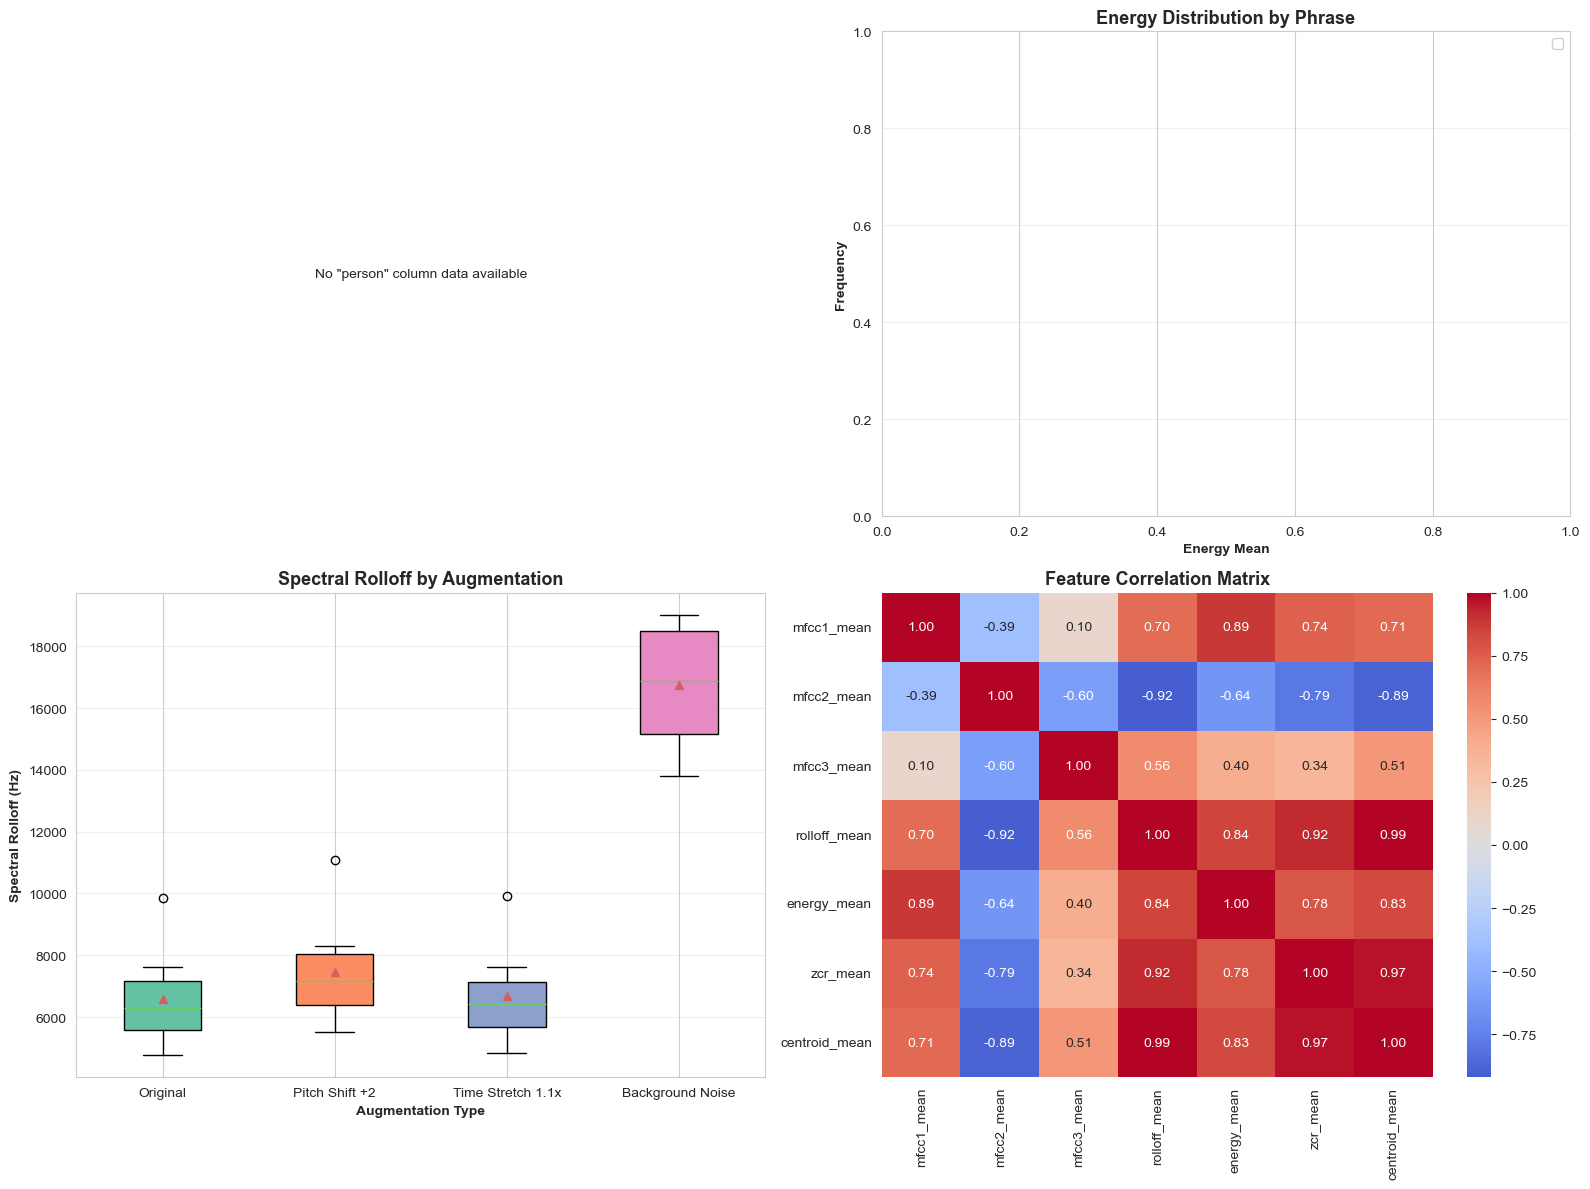

In [29]:
def plot_feature_distributions(df, save_path='audio_visualizations'):
       
    os.makedirs(save_path, exist_ok=True)
    print("🎧 Generating visualizations...")

    # Check data presence
    if df.empty:
        print(" The DataFrame is empty. Please check your feature extraction steps.")
        return

    if 'person' not in df.columns or df['person'].dropna().nunique() == 0:
        print(" No 'person' values found — skipping MFCC-by-person plot.")
        mfcc_by_person = False
    else:
        mfcc_by_person = True

    fig, axes = plt.subplots(2, 2, figsize=(16, 12))
    
    #  MFCC Mean Values by Person
    ax1 = axes[0, 0]
    if mfcc_by_person:
        mfcc_cols = [col for col in df.columns if 'mfcc' in col and 'mean' in col]
        mfcc_data = df.groupby('person')[mfcc_cols].mean()
        
        if len(mfcc_data) > 0:
            x = np.arange(len(mfcc_cols))
            width = 0.8 / len(mfcc_data)
            colors_palette = sns.color_palette("husl", len(mfcc_data))
            
            for idx, (person, row) in enumerate(mfcc_data.iterrows()):
                ax1.bar(x + idx * width, row.values, width, label=str(person),
                        color=colors_palette[idx], alpha=0.8)
            
            ax1.set_xlabel('MFCC Coefficient', fontweight='bold')
            ax1.set_ylabel('Mean Value', fontweight='bold')
            ax1.set_title('MFCC Mean Values by Speaker', fontsize=13, fontweight='bold')
            ax1.set_xticks(x + width * (len(mfcc_data)-1)/2)
            ax1.set_xticklabels([f'MFCC {i+1}' for i in range(len(mfcc_cols))], rotation=45)
            ax1.legend(title='Speaker', framealpha=0.9)
            ax1.grid(axis='y', alpha=0.3)
        else:
            ax1.text(0.5, 0.5, 'No valid speaker data', ha='center', va='center')
            ax1.axis('off')
    else:
        ax1.text(0.5, 0.5, 'No "person" column data available', ha='center', va='center')
        ax1.axis('off')
    
    #  Energy Distribution by Phrase
    ax2 = axes[0, 1]
    if 'phrase' in df.columns and 'energy_mean' in df.columns:
        for phrase in df['phrase'].dropna().unique():
            phrase_data = df[df['phrase'] == phrase]['energy_mean']
            ax2.hist(phrase_data, bins=15, alpha=0.6, label=phrase.replace('_', ' '),
                     edgecolor='black')
        ax2.set_xlabel('Energy Mean', fontweight='bold')
        ax2.set_ylabel('Frequency', fontweight='bold')
        ax2.set_title('Energy Distribution by Phrase', fontsize=13, fontweight='bold')
        ax2.legend(framealpha=0.9)
        ax2.grid(axis='y', alpha=0.3)
    else:
        ax2.text(0.5, 0.5, 'No phrase or energy data found', ha='center', va='center')
        ax2.axis('off')
    
    #  Spectral Rolloff by Augmentation
    ax3 = axes[1, 0]
    if 'augmentation' in df.columns and 'rolloff_mean' in df.columns:
        aug_order = df['augmentation'].dropna().unique().tolist()
        rolloff_by_aug = [df[df['augmentation'] == aug]['rolloff_mean'].values for aug in aug_order]
        bp = ax3.boxplot(rolloff_by_aug, labels=aug_order, patch_artist=True, showmeans=True)
        colors = sns.color_palette("Set2", len(rolloff_by_aug))
        for patch, color in zip(bp['boxes'], colors):
            patch.set_facecolor(color)
        ax3.set_xlabel('Augmentation Type', fontweight='bold')
        ax3.set_ylabel('Spectral Rolloff (Hz)', fontweight='bold')
        ax3.set_title('Spectral Rolloff by Augmentation', fontsize=13, fontweight='bold')
        ax3.grid(axis='y', alpha=0.3)
    else:
        ax3.text(0.5, 0.5, 'No augmentation data found', ha='center', va='center')
        ax3.axis('off')

    #  Correlation Heatmap
    ax4 = axes[1, 1]
    feature_cols = [c for c in df.columns if any(f in c for f in ['energy_mean', 'rolloff_mean', 'zcr_mean', 'centroid_mean', 'mfcc1_mean', 'mfcc2_mean', 'mfcc3_mean'])]
    if len(feature_cols) > 1:
        corr = df[feature_cols].corr()
        sns.heatmap(corr, annot=True, fmt='.2f', cmap='coolwarm', center=0, ax=ax4)
        ax4.set_title('Feature Correlation Matrix', fontsize=13, fontweight='bold')
    else:
        ax4.text(0.5, 0.5, 'Not enough features for correlation', ha='center', va='center')
        ax4.axis('off')

    plt.tight_layout()
    plt.savefig(f'{save_path}/feature_distributions.png', dpi=300, bbox_inches='tight')
    print(f" Feature visualizations saved to: {save_path}/feature_distributions.png")
    plt.show()


# Run visualization
plot_feature_distributions(complete_audio_features)

#### **Step 10: Save Audio Features to CSV**

After extracting and visualizing, this step saves all your features in a single CSV file — ready for training your machine learning model later.

In [30]:
# Step 10: Save all extracted features to a CSV file
import pandas as pd

# Make sure your complete feature DataFrame exists
if 'complete_audio_features' in locals():
    output_path = "processed_audio_features.csv"
    complete_audio_features.to_csv(output_path, index=False)
    print(f" All features saved successfully to '{output_path}'")
    print(" You can reload it anytime using:")
    print("   pd.read_csv('processed_audio_features.csv')")
else:
    print(" 'complete_audio_features' not found. Please run Step 8 or Step 9 first.")

 All features saved successfully to 'processed_audio_features.csv'
 You can reload it anytime using:
   pd.read_csv('processed_audio_features.csv')
